In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def f(x):
    return x/(x**2+1)
    #return 1-x-4*(x**3)+2*(x**5)
    #return math.exp(math.sin(x))
    #return (math.sin(x))**(0.5)

In [22]:
def trapezio_simples(a,b,f):
    fa = f(a)
    fb = f(b)
    I = ((b-a)/2)*(fa+fb)
    return I

In [6]:
def simpson1_simples(a,b,f):
    h = (b-a)/2
    pm = a+h
    fa = f(a)
    fpm = f(pm)
    fb = f(b)
    I = (h/3)*(fa+4*fpm+fb)
    return I

In [7]:
def simpson2_simples(a,b,f):
    h = (b-a)/3
    pm1 = a+h
    pm2 = pm1+h
    fa = f(a)
    fpm1 = f(pm1)
    fpm2 = f(pm2)
    fb = f(b)
    I = (3*h/8)*(fa+3*fpm1+3*fpm2+fb)
    return I

In [8]:
I1 = trapezio_simples(0,1,f)
print(I1)
I2 = simpson1_simples(0,1,f)
print(I2)
I3 = simpson2_simples(0,1,f)
print(I3)


0.25
0.35
0.34807692307692306


In [24]:
## Calculando o erro da integração pelo método do Trapézio

def calcula_erro_trapezio(a,b,f):
    h = (b-a)/2
    a0 = a
    xi = []
    yi = []
    id = 1
    xi.append(a)
    yi.append(f(a))
    while id <=2:
        a = a+h
        xi.append(a)
        yi.append(f(a))
        id = id+1
    xi = np.array(xi)
    yi = np.array(yi)
    a = a0
    Matriz_Newton = np.zeros([id,id+1])
    for i in range(0,id):
        Matriz_Newton[i,0] = xi[i]
        Matriz_Newton[i,1] = yi[i]
        
    for i in range(2,id+1):
        for j in range(0,id-i+1):
            Matriz_Newton[j,i] = (Matriz_Newton[j+1,i-1]-Matriz_Newton[j,i-1])/(Matriz_Newton[j+i-1,0]-Matriz_Newton[j,0])
    
    Valor_Medio_Der_2 = Matriz_Newton[0,3]
    Erro = (-1*((b-a)**3)/12)*Valor_Medio_Der_2
    return(Matriz_Newton,Erro)


   


        
    
        
        
    

In [25]:
[Matriz,Erro] = calcula_erro_trapezio(0,1,f)
print(Matriz)
print(Erro)

[[ 0.   0.   0.8 -0.6]
 [ 0.5  0.4  0.2  0. ]
 [ 1.   0.5  0.   0. ]]
0.05


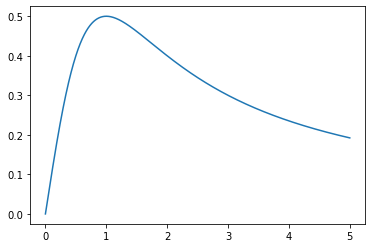

In [34]:
xx=np.linspace(0,1,1000)
yy=[]
for xxi in xx:
    yy.append(f(xxi))  
plt.plot(xx, yy, label="Polinomio Interpolador")


In [30]:
## Calculando o erro da integração pelo método do Trapézio

def calcula_erro_simpson1(a,b,f):
    h = (b-a)/4
    a0 = a
    xi = []
    yi = []
    id = 1
    xi.append(a)
    yi.append(f(a))
    while id <=4:
        a = a+h
        xi.append(a)
        yi.append(f(a))
        id = id+1
    xi = np.array(xi)
    yi = np.array(yi)
    a = a0
    Matriz_Newton = np.zeros([id,id+1])
    for i in range(0,id):
        Matriz_Newton[i,0] = xi[i]
        Matriz_Newton[i,1] = yi[i]
        
    for i in range(2,id+1):
        for j in range(0,id-i+1):
            Matriz_Newton[j,i] = (Matriz_Newton[j+1,i-1]-Matriz_Newton[j,i-1])/(Matriz_Newton[j+i-1,0]-Matriz_Newton[j,0])
    
    Valor_Medio_Der_4 = Matriz_Newton[0,5]
    Erro = (-1*(((b-a)/2)**5)/90)*Valor_Medio_Der_4
    return(Matriz_Newton,Erro)

In [31]:
[Matriz,Erro] = calcula_erro_simpson1(0,1,f)
print(Matriz)
print(Erro)

[[ 0.          0.          0.94117647 -0.56470588 -0.15058824  0.41411765]
 [ 0.25        0.23529412  0.65882353 -0.67764706  0.26352941  0.        ]
 [ 0.5         0.4         0.32       -0.48        0.          0.        ]
 [ 0.75        0.48        0.08        0.          0.          0.        ]
 [ 1.          0.5         0.          0.          0.          0.        ]]
-0.0001437908496732034


In [32]:
def calcula_erro_simpson2(a,b,f):
    h = (b-a)/4
    a0 = a
    xi = []
    yi = []
    id = 1
    xi.append(a)
    yi.append(f(a))
    while id <=4:
        a = a+h
        xi.append(a)
        yi.append(f(a))
        id = id+1
    xi = np.array(xi)
    yi = np.array(yi)
    a = a0
    Matriz_Newton = np.zeros([id,id+1])
    for i in range(0,id):
        Matriz_Newton[i,0] = xi[i]
        Matriz_Newton[i,1] = yi[i]
        
    for i in range(2,id+1):
        for j in range(0,id-i+1):
            Matriz_Newton[j,i] = (Matriz_Newton[j+1,i-1]-Matriz_Newton[j,i-1])/(Matriz_Newton[j+i-1,0]-Matriz_Newton[j,0])
    
    Valor_Medio_Der_4 = Matriz_Newton[0,5]
    Erro = (-3*(((b-a)/3)**5)/80)*Valor_Medio_Der_4
    return(Matriz_Newton,Erro)

In [33]:
[Matriz,Erro] = calcula_erro_simpson2(0,1,f)
print(Matriz)
print(Erro)

[[ 0.          0.          0.94117647 -0.56470588 -0.15058824  0.41411765]
 [ 0.25        0.23529412  0.65882353 -0.67764706  0.26352941  0.        ]
 [ 0.5         0.4         0.32       -0.48        0.          0.        ]
 [ 0.75        0.48        0.08        0.          0.          0.        ]
 [ 1.          0.5         0.          0.          0.          0.        ]]
-6.39070442992015e-05


In [23]:
def trapezio_multipla(a,b,nint):
    soma = 0
    h = (b-a)/nint
    for i in range(0,nint):
        bi = a+h
        soma = soma+trapezio_simples(a,bi,f)
        a = bi
    return soma

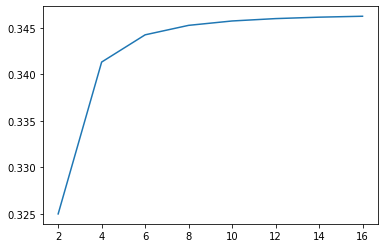

In [45]:
xx=np.linspace(2,16,8)
yy=[]
for xxi in xx:
    yy.append(trapezio_multipla(0,1,int(xxi)))  
plt.plot(xx, yy)


In [46]:
print(yy)

[0.325, 0.3413235294117647, 0.34425065039819136, 0.3452689484372228, 0.3457392112718763, 0.3459943828911342, 0.34614814852786663, 0.346247910263477]


In [57]:
def f(x):
    return np.log(x)*math.sin(x)
    #return 1-x-4*(x**3)+2*(x**5)
    #return math.exp(math.sin(x))
    #return (math.sin(x))**(0.5)

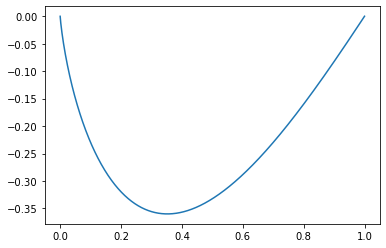

In [49]:
xx=np.linspace(0.00001,1,1000)
yy=[]
for xxi in xx:
    yy.append(f(xxi))  
plt.plot(xx, yy, label="Polinomio Interpolador")


In [9]:
def quadratura_2pontos(a,b,f):
    t0 = -0.57735
    t1 = 0.57735
    x0 = ((b-a)/2)*t0+((a+b)/2)
    x1 = ((b-a)/2)*t1+((a+b)/2)
    fx0 = f(x0)
    fx1 = f(x1)
    I = ((b-a)/2)*(fx0+fx1)
    return I

In [51]:
I = quadratura_2pontos(0,1,f)
print(I)

-0.24722615788770022


In [53]:
vref = -0.2398117420
erro_perc = np.abs((I-vref)/(vref))
print(100*erro_perc)

3.0917651595642996


In [10]:
def quadratura_3pontos(a,b,f):
    t0 = -0.77459
    t1 = 0
    t2 = 0.77459
    x0 = ((b-a)/2)*t0+((a+b)/2)

    x1 = ((b-a)/2)*t1+((a+b)/2)
   
    x2 = ((b-a)/2)*t2+((a+b)/2)
   
    fx0 = f(x0)
    fx1 = f(x1)
    fx2 = f(x2)
    A0 = 0.555555555555556
    A1 = 0.888888888888889
    A2 = 0.555555555555556
    I = ((b-a)/2)*(A0*fx0+A1*fx1+A2*fx2)
    return I

In [61]:
I = quadratura_3pontos(0,1,f)
print(I)

0.112705
0.5
0.887295
-0.24164691850242967


In [62]:
erro_perc = np.abs((I-vref)/(vref))
print(100*erro_perc)

0.7652571500980445


In [43]:
def f(x):
    return np.exp(-1*x)*((math.sin(x))**2)
    #return 1-x-4*(x**3)+2*(x**5)
    #return math.exp(math.sin(x))
    #return (math.sin(x))**(0.5)

In [44]:
def trapezio_multipla(a,b,nint,f):
    soma = 0
    h = (b-a)/nint
    for i in range(0,nint):
        bi = a+h
        soma = soma+trapezio_simples(a,bi,f)
        a = bi
    return soma

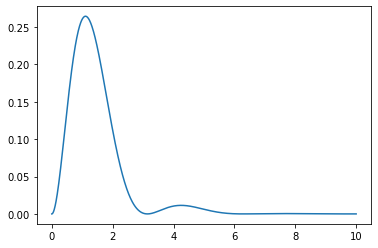

In [45]:
xx=np.linspace(0,10,1000)
yy=[]
for xxi in xx:
    yy.append(f(xxi))  
plt.plot(xx, yy, label="Polinomio Interpolador")

In [48]:
I1 = quadratura_3pontos(0,10,f)
print(I1)

0.7617270177280021


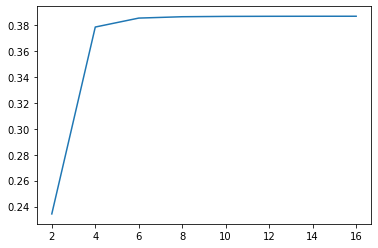

In [60]:
xx=np.linspace(2,16,8)
yy=[]
for xxi in xx:
    yy.append(trapezio_multipla(0,4,int(xxi),f))  
plt.plot(xx, yy)

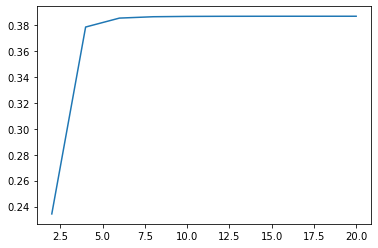

In [61]:
xx=np.linspace(2,20,10)
yy=[]
for xxi in xx:
    yy.append(trapezio_multipla(0,4,int(xxi),f))  
plt.plot(xx, yy)

In [62]:
print(yy)

[0.23428661028513043, 0.3786204608962048, 0.38553287646110657, 0.3865802771121689, 0.386837640289426, 0.38691860622628316, 0.386947667812657, 0.38695863596475644, 0.3869625827156908, 0.3869636286404887]


In [63]:
I1 = yy[-1]
print(I1)

0.3869636286404887


In [54]:
def g(x):
    return (1/(x**2))*f(1/x)

In [31]:
def integral_impropria1(a,g):
    ini = 0
    fim = 1/a
    #I = quadratura_3pontos(ini,fim,g)
    I = trapezio_multipla(ini,fim,50,g)
    return I

In [64]:
I2 = integral_impropria1(4,g)
print(I2)

0.01724681862967498


In [65]:
I = I1+I2
print(I)

0.4042104472701637
